In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
w=pd.read_csv('webscrape.csv')

In [4]:
w.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [5]:
w.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [6]:
w.duplicated().sum()

0

In [7]:
w.head(2)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"


In [8]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [9]:
w['Revenue (USD millions)'] = w['Revenue (USD millions)'].str.replace(',','').astype(float)
w['Revenue growth'] = w["Revenue growth"].str.rstrip('%').astype(float)
w['Employees'] = w ["Employees"].str.replace(',','').astype(int)

In [10]:
w.head(2)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289.0,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,513983.0,9.4,1540000,"Seattle, Washington"


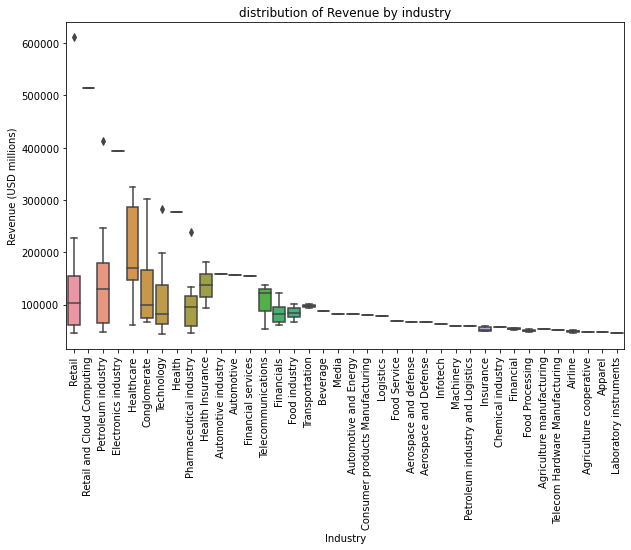

In [11]:
# Visualization: Distribution of Revenue by Industry
plt.figure(figsize=(10,6))
sns.boxplot(data=w,x='Industry',y='Revenue (USD millions)')
plt.xticks(rotation=90)
plt.title('distribution of Revenue by industry')
plt.show()

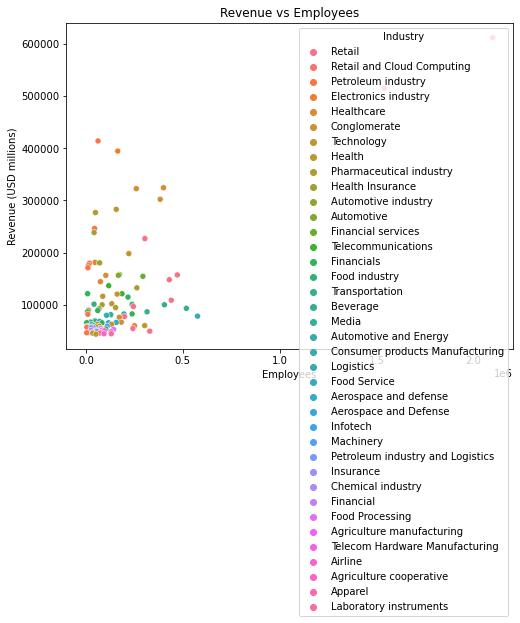

In [12]:
# Visualization: Scatter plot of Revenue vs Employees
plt.figure(figsize=(8, 6))
sns.scatterplot(data=w,x='Employees',y='Revenue (USD millions)',hue='Industry')
plt.title('Revenue vs Employees')
plt.show()

In [13]:
#Step 4: Visualize Correlation Heatmap
#compute correlation matrix
correlation_matrix=w[['Revenue (USD millions)', 'Revenue growth', 'Employees']].corr()
correlation_matrix

,Revenue (USD millions),Revenue growth,Employees
Revenue (USD millions),1.000000,-0.096356,0.641996
Revenue growth,-0.096356,1.000000,-0.230081
Employees,0.641996,-0.230081,1.000000


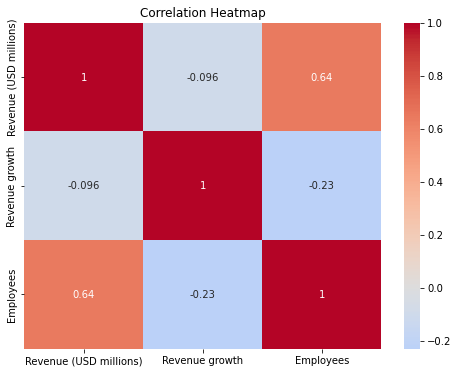

In [14]:
 #Visualization: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

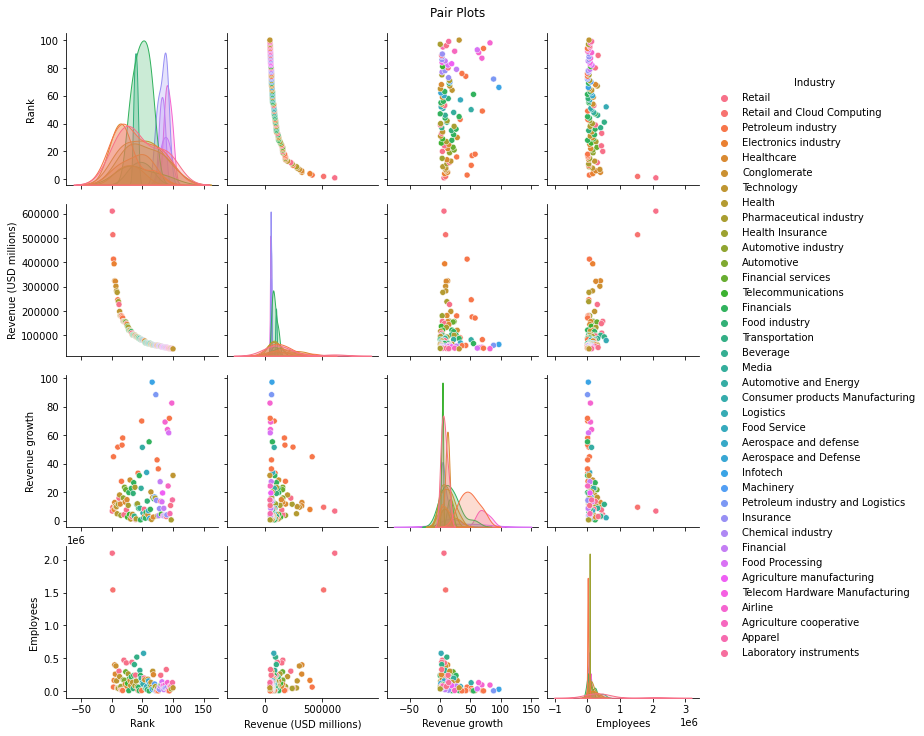

In [15]:
# Visualization: Pair Plots
sns.pairplot(data=w, hue='Industry')
plt.suptitle('Pair Plots', y=1.02)
plt.show()

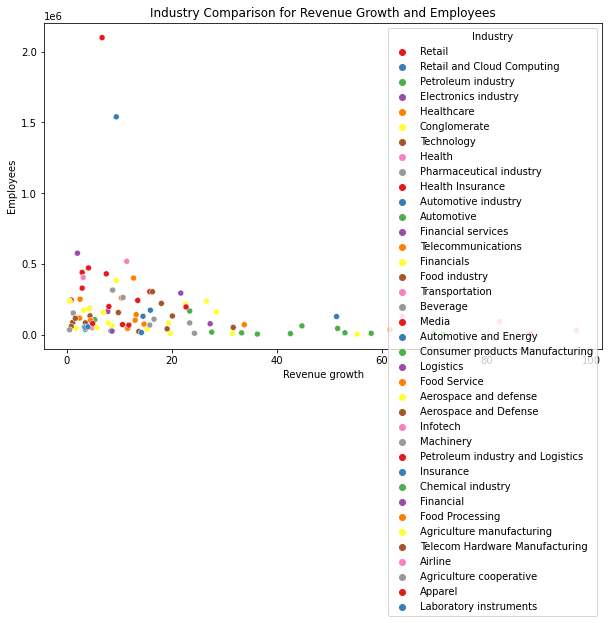

In [16]:
# Visualization: Industry Comparison for Revenue Growth and Employees
plt.figure(figsize=(10, 6))
sns.scatterplot(data=w, x='Revenue growth', y='Employees', hue='Industry', palette='Set1')
plt.title('Industry Comparison for Revenue Growth and Employees')
plt.show()

In [17]:
#show summary statistics
summary=w.groupby('Industry').agg({'Revenue (USD millions)': 'mean', 'Revenue growth': 'mean', 'Employees': 'mean'})
summary

,Revenue (USD millions),Revenue growth,Employees
Industry,,,
Aerospace and Defense,65984.000000,1.600000,1.160000e+05
Aerospace and defense,66608.000000,6.900000,1.560000e+05
Agriculture cooperative,47194.000000,24.300000,1.001400e+04
Agriculture manufacturing,52577.000000,19.400000,8.223900e+04
Airline,48169.333333,71.866667,1.058317e+05
Apparel,46710.000000,4.900000,7.910000e+04
Automotive,156735.000000,23.400000,1.670000e+05
Automotive and Energy,81462.000000,51.400000,1.278550e+05
Automotive industry,158057.000000,15.900000,1.730000e+05


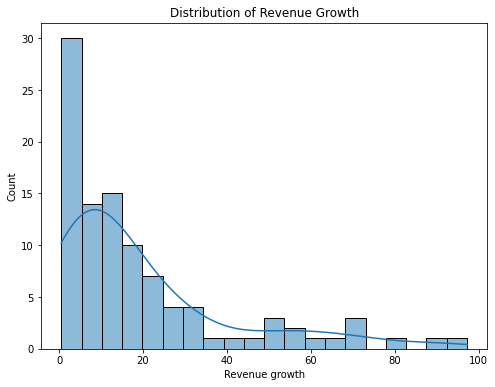

In [18]:
#Step 8: Visualize Distribution of Revenue Growth
plt.figure(figsize=(8, 6))
sns.histplot(data=w, x='Revenue growth', bins=20, kde=True)
plt.title('Distribution of Revenue Growth')
plt.show()

In [19]:
# Prepare data
X = w[['Revenue (USD millions)', 'Employees']]
y = w['Revenue growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 374.01
R-squared: -0.58
Coefficients: [ 1.94996105e-05 -3.59666924e-05]
Intercept: 23.918469206551816


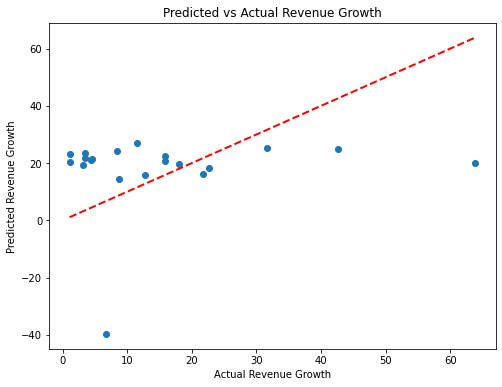

In [20]:
# Visualization: Predicted vs Actual Revenue Growth
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Revenue Growth')
plt.ylabel('Predicted Revenue Growth')
plt.title('Predicted vs Actual Revenue Growth')
plt.show()

In [23]:
#Step 11: Predict Top 5 Companies Using Classification


# Convert 'Industry' to numerical values using Label Encoding
label_encoder = LabelEncoder()
w['Industry_encoded'] = label_encoder.fit_transform(w['Industry'])

# Prepare data
X_classify = w[['Revenue growth', 'Employees', 'Industry_encoded']]
y_classify = (w['Rank'] <= 5).astype(int)

X_train_classify, X_test_classify, y_train_classify, y_test_classify = train_test_split(
    X_classify, y_classify, test_size=0.2, random_state=42
)

# Create and train the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_classify, y_train_classify)

# Make predictions
y_pred_classify = classifier.predict(X_test_classify)

# Evaluate the classifier
accuracy = accuracy_score(y_test_classify, y_pred_classify)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


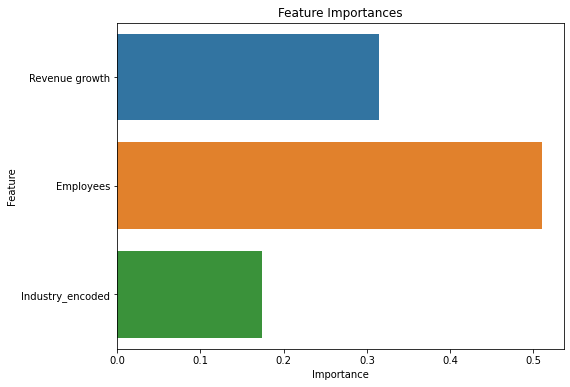

In [24]:
# Visualization: Feature Importances
feature_importances = classifier.feature_importances_
features = X_classify.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()